In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
main_path = 'D:\\Downloads\\'
clusters_v0_df = pd.read_csv(main_path + 'clusters-4-v0.csv')
clusters_v1_df = pd.read_csv(main_path + 'clusters-4-v1.csv')
clusters_v2_df = pd.read_csv(main_path + 'clusters-4-v2.csv')


display(clusters_v0_df)
display(clusters_v1_df)
display(clusters_v2_df)

,x1,x2,y
0,-19.205039,15.905880,1
1,-8.081249,30.322485,1
2,-21.284312,22.407210,1
3,-14.661466,25.668522,1
4,-6.461822,17.406663,1
...,...,...,...
1435,42.626596,-29.882691,4
1436,43.465376,-23.001958,4
1437,46.358862,-29.557741,4
1438,42.809519,-26.078532,4


,x1,x2,y
0,-12.304702,3.499240,1
1,-21.302900,17.983794,1
2,-6.320254,29.639092,1
3,2.259775,26.227155,1
4,-14.777150,19.536615,1
...,...,...,...
1435,50.450656,-11.950103,4
1436,49.692856,-17.175831,4
1437,59.579815,-24.594350,4
1438,31.231241,-24.288964,4


,x1,x2,y
0,2.695298,-11.500760,1
1,-6.302900,2.983794,1
2,8.679746,14.639092,1
3,17.259775,11.227155,1
4,0.222850,4.536615,1
...,...,...,...
1435,65.450656,-11.950103,4
1436,64.692856,-17.175831,4
1437,74.579815,-24.594350,4
1438,46.231241,-24.288964,4


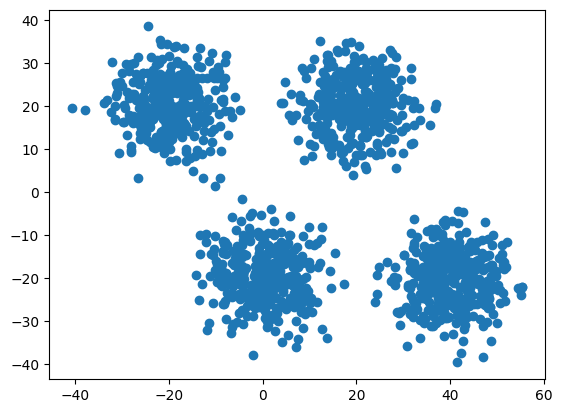

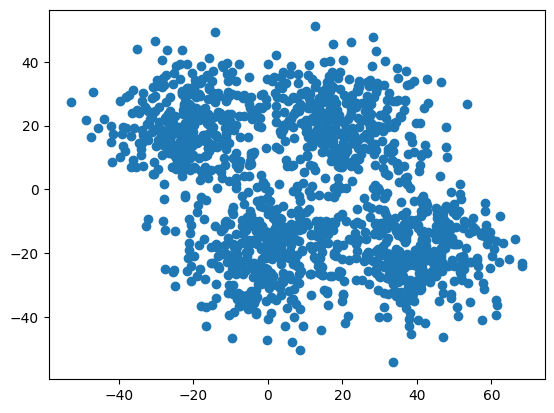

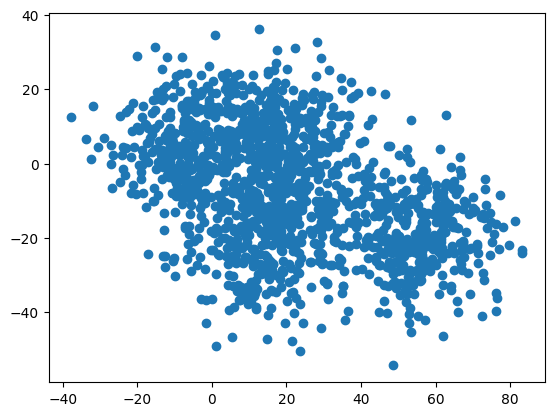

In [ ]:
# display(clusters_v0_df)
# display(clusters_v1_df)
# display(clusters_v2_df)

v0_x1 = clusters_v0_df['x1']
v0_x2 = clusters_v0_df['x2']
v0_y  = clusters_v0_df['y']

plt.scatter(v0_x1,v0_x2)
plt.show();

v1_x1 = clusters_v1_df['x1']
v1_x2 = clusters_v1_df['x2']
v1_y  = clusters_v1_df['y']

plt.scatter(v1_x1,v1_x2)
plt.show();

v2_x1 = clusters_v2_df['x1']
v2_x2 = clusters_v2_df['x2']
v2_y  = clusters_v2_df['y']

plt.scatter(v2_x1,v2_x2)
plt.show();


#by looking at the plots i can say that logictic regression would perform great in the first dataframe, a bit lower in second and lowest in the 3rd one as the boundaries would be difficult to predict in them.

In [7]:
X = clusters_v0_df[['x1', 'x2']].values
y = clusters_v0_df['y'].values

print("shape:", clusters_v0_df.shape)
print("class distribution:\n", clusters_v0_df['y'].value_counts(normalize=True))
print(clusters_v0_df.describe())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

shape: (1440, 3)
class distribution:
 y
1    0.25
2    0.25
3    0.25
4    0.25
Name: proportion, dtype: float64
                x1           x2            y
count  1440.000000  1440.000000  1440.000000
mean     10.100503     0.217573     2.500000
std      23.239573    21.133814     1.118422
min     -40.704233   -39.673196     1.000000
25%      -9.580129   -19.847686     1.750000
50%       9.975014    -0.079558     2.500000
75%      30.001049    20.268484     3.250000
max      55.349930    38.471219     4.000000


In [ ]:
# 4) Pipeline
# We include scaling and optionally PolynomialFeatures. We will toggle polynomial in GridSearch.
pipe = Pipeline([
    ('scaler', StandardScaler()),                # scale features
    ('poly', PolynomialFeatures(degree=1, include_bias=False)),  # degree will be tuned
    ('clf', LogisticRegression(
        multi_class='multinomial',    # softmax
        solver='lbfgs',              # 'lbfgs' or 'saga' supports multinomial
        max_iter=1000,
        random_state=42
    ))
])

In [10]:
# 5) Hyperparameter grid
# - C: inverse of regularization strength (smaller C -> stronger regularization)
# - penalty: 'l2' for lbfgs; if using 'saga' you can try 'l1' too
# - poly__degree: 1 for linear boundary, 2 or 3 for polynomial interactions
param_grid = {
    'poly__degree': [1, 2, 3],          # try linear, quadratic, cubic
    'clf__C': [0.01, 0.1, 1.0, 10.0],   # regularization strength
    'clf__penalty': ['l2'],             # 'l1' only if solver='saga'
    # if you want to try L1, switch solver to 'saga' and add 'l1' here
}

In [11]:
# 6) Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(pipe, param_grid, cv=cv, scoring='accuracy', n_jobs=-1, verbose=1)

In [12]:
# 7) Fit
grid.fit(X_train, y_train)
print("Best params:", grid.best_params_)
print("Best CV score:", grid.best_score_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best params: {'clf__C': 0.01, 'clf__penalty': 'l2', 'poly__degree': 1}
Best CV score: 1.0


c:\Users\Sumed\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [13]:
# 8) Evaluate on test
best = grid.best_estimator_
y_pred = best.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))


Test accuracy: 1.0
Classification report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        72
           2       1.00      1.00      1.00        72
           3       1.00      1.00      1.00        72
           4       1.00      1.00      1.00        72

    accuracy                           1.00       288
   macro avg       1.00      1.00      1.00       288
weighted avg       1.00      1.00      1.00       288

Confusion matrix:
 [[72  0  0  0]
 [ 0 72  0  0]
 [ 0  0 72  0]
 [ 0  0  0 72]]


Multiclass ROC-AUC (OvR, macro): 1.0


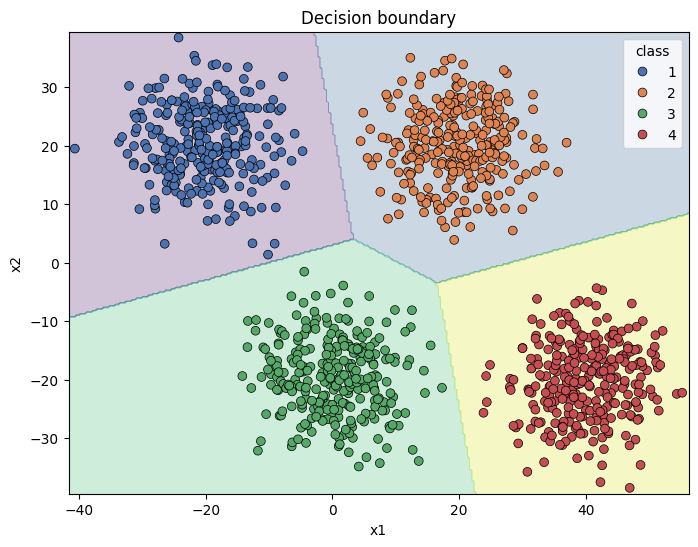

In [16]:
# 9) Optional: multiclass ROC-AUC (one-vs-rest)
# sklearn's roc_auc_score supports multi_class='ovr' (one-vs-rest) or 'ovo'
try:
    y_proba = best.predict_proba(X_test)
    auc = roc_auc_score(pd.get_dummies(y_test), y_proba, average='macro', multi_class='ovr')
    print("Multiclass ROC-AUC (OvR, macro):", auc)
except Exception as e:
    print("ROC-AUC calculation failed:", e)

# 10) Plot decision boundaries (works because X has 2 features)
def plot_decision_boundary(model, X, y, title="Decision boundary"):
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, alpha=0.25)
    sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, palette='deep', edgecolor='k', s=40)
    plt.title(title)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend(title='class')
    plt.show()

plot_decision_boundary(best, X_train,y_train)